## Research Dissertation Notebook: Enhancing Credit Score Modelling Stability through Data Science Techniques

### Introduction
<p>
 
<div style="text-align: justify;">
  
This Python notebook is dedicated to the research dissertation titled **"Enhancing Credit Score Modelling Stability through Data Science Techniques."** The aim of the research is to develop a robust and accurate credit score model for predicting customer behaviour based on a large and imbalanced dataset. This research focuses on improving model performance and explainability through effective data preprocessing, synthetic data generation techniques for class balancing, feature selection, evaluating model stability under augmented data conditions, and model explainability.

In this notebook, we will perform:

- **Class Balancing**: Apply the Synthetic Minority Oversampling Technique (SMOTE) to balance the imbalanced credit dataset, enhancing model training and performance.
- **Feature Selection**: Use univariate ANOVA F-tests to identify and select the most important features that contribute to the prediction of the target variable, reducing computational complexity and enhancing model interpretability.
- **Model Development and Evaluation**: Build at least three artificial intelligent systems for credit scoring models.
- **Synthetic Data Augmentation**: Generate synthetic data using specified augmentation techniques to simulate real-world data variations to represent dataset shifts.
- **Model Stability Evaluation**: Evaluate the stability scores of trained models under augmented data conditions to measure their resilience, robustness, and generalizability. 
- **Model Explainability**: Conduct Sobol sensitivity analysis and SHAP to determine the influence of individual features on prediction outcomes and understand the reasoning behind model predictions

</div>

##### Author: F315284 | Date: August 2024



#### Please install the below necessary libraries in addition to the libraries that comes with jupyter IDE and python

In [3]:
## Please install the below necessary libraries in addition to the libraries that comes with jupyter IDE and python
# !pip install SALib
# !pip install imbalanced-learn
# !pip install category_encoders
# !pip install shap
# !pip install stqdm
# !pip install streamlit


#### Import libraries

In [1]:
# Import libraries
from IPython.display import display
import gc
import warnings
import os
import time
from tqdm import tqdm

# Import program modules
import data_loading as data
import data_exploration as xplore
import missing_value_handler as mvh
import feature_engineering as feat_eng
import general_function as gen_func
import class_balancing as cb
import feature_selection as feat_select
import model_development as model_dev
import sythetic_data_augmentation as sda
import model_explainability as model_explainer


# Filter out fragmentation warnings
warnings.filterwarnings("ignore")


C:\Users\coao\.conda\envs\my_envr\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-23 10:45:03.921 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


### Load Data

+ Run this module to load the research dataset from the directory

In [3]:
# Run this data loading funtion to load the dataset
data.load_files()

Loading Data: 100%|██████████████████████████████████████████████████████████████████████| 7/7 [00:24<00:00,  3.48s/it]


Data Loading: Step 1 completed!!!
-----------------------------------
application_train data was loaded successfully
bureau data was loaded successfully
bureau_balance data was loaded successfully
credit_card_balance data was loaded successfully
installments_payments data was loaded successfully
POS_CASH_balance data was loaded successfully
previous_application data was loaded successfully


### Exploratory Data Analysis

+ Run the functions in this module to perform exploratory data analysis on both the target and input variables

In [4]:
# Run this function to view the shapes of the dataset
xplore.dataset_shape()

Exploratory Data Analysis: Dataset Shape Analysis
-------------------------------------------------



Analyzing Dataset Shape: 100%|███████████████████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]

The shape of the application_train is: 307,511 rows, and 121 columns
The shape of the bureau is: 1,716,428 rows, and 16 columns
The shape of the bureau_balance is: 27,299,925 rows, and 2 columns
The shape of the credit_card_balance is: 3,840,312 rows, and 22 columns
The shape of the installments_payments is: 13,605,401 rows, and 7 columns
The shape of the POS_CASH_balance is: 10,001,358 rows, and 7 columns
The shape of the previous_application is: 1,670,214 rows, and 36 columns

Step 2 completed!!!



#### Run this function to view the exploratory analysis on the target variable

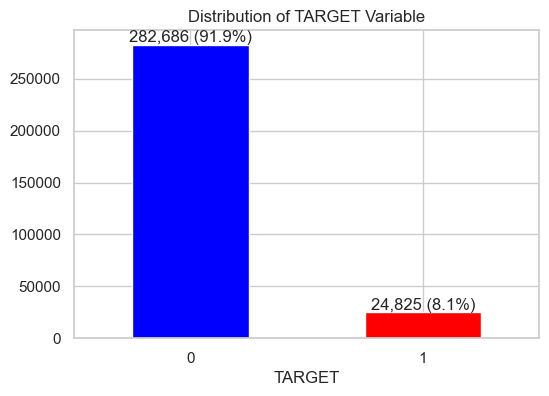

Exploratory Data Analysis: Target Variable Analysis
-------------------------------------------------

Unique Values of Target Variable are: 1 and 0
Count of missing values in Target Variable is: 0

Step 3 completed!!!



In [5]:
# Run this function to view the exploratory analysis on the target variable
xplore.target_variable_EDA()

#### Run this function to view the exploratory analysis on the input variables

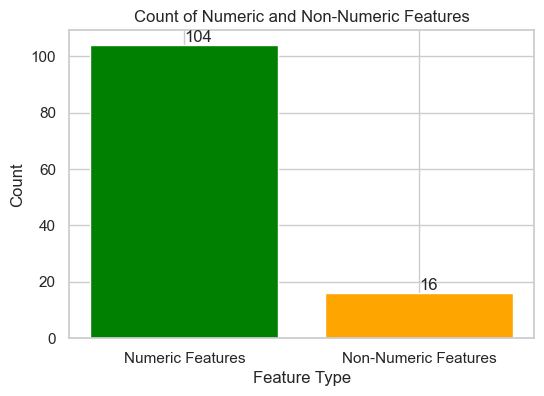

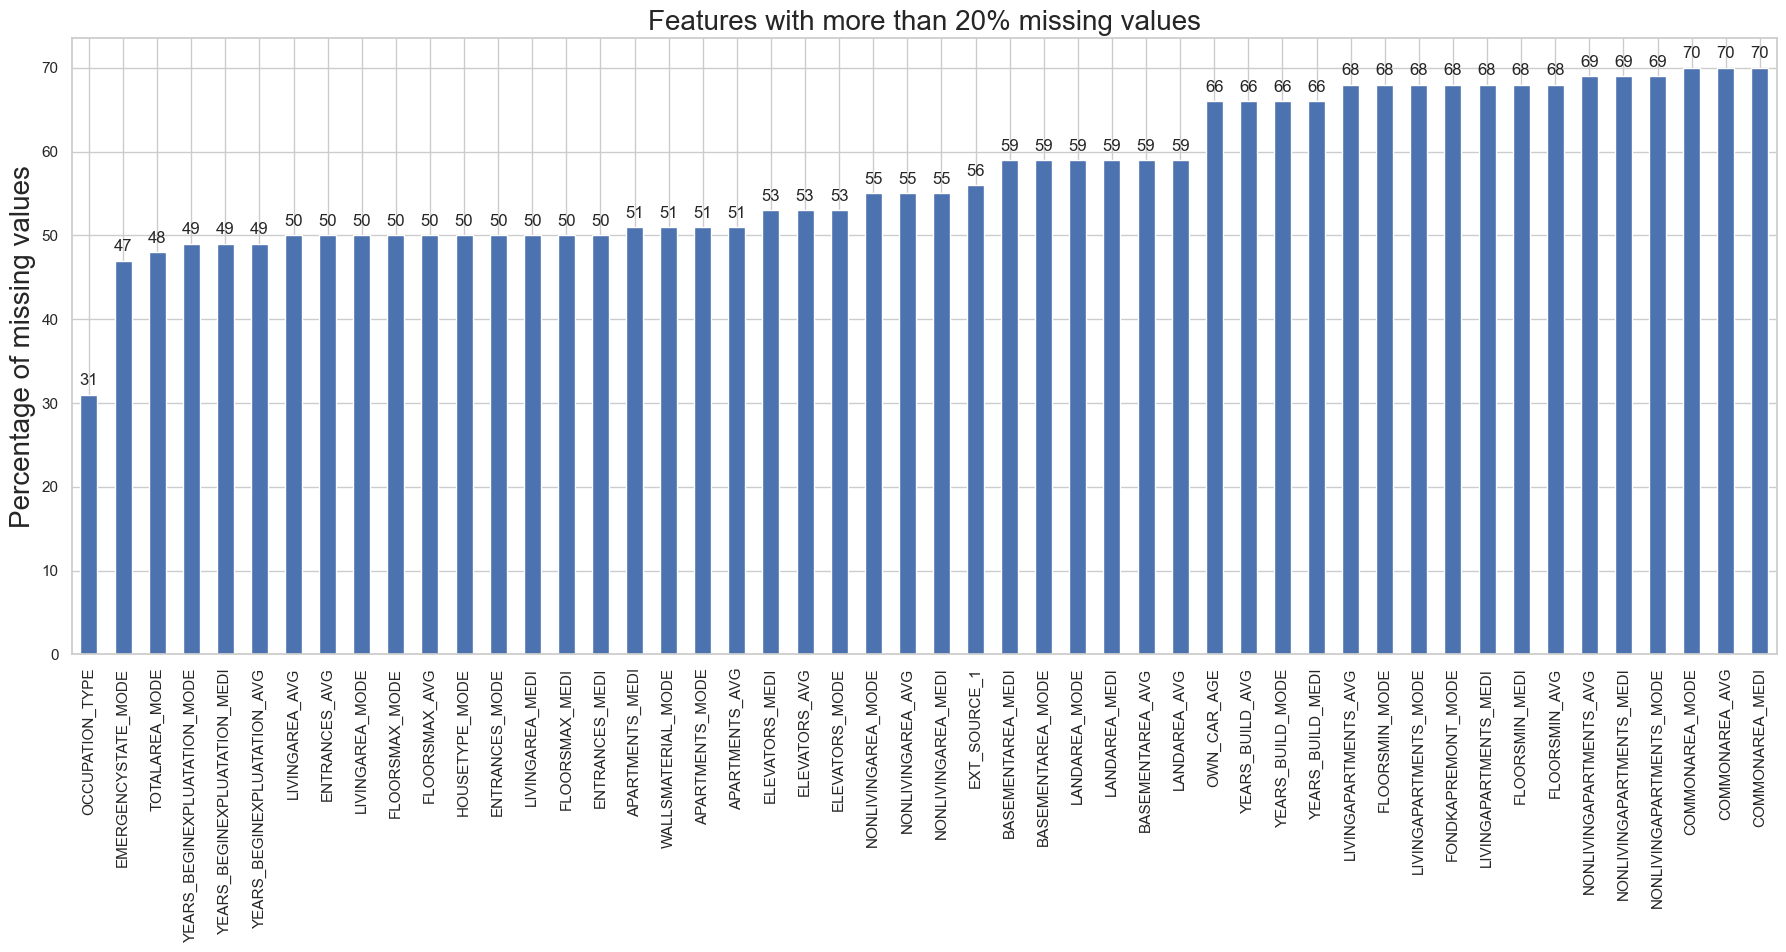

Exploratory Data Analysis: Input Variable Analysis
-------------------------------------------------

Number of features with more than 20% missing values is: 50
Count of duplicated records is: 0

Step 3 completed!!!



In [6]:
# Run this function to view the exploratory analysis on the input variables
xplore.input_variable_EDA()

### Preprocessing Operations

##### Missing Value Handler

In [7]:
## Missing value handler

# This Python module contains functions for handling the missing values in the application train dataset.
# Run this function to handling the missing values in the application train dataset by dropping features
# with over 20% missing values, replaces specific placeholder values (e.g., "XNA", "XAP", "Unknown") 
# and anomalous values (e.g., 365243 in 'DAYS_EMPLOYED') with NaN.


mvh.na_handler()

Preprocessing: Handling Missing Values
-------------------------------------------------

The shape of the Input variables is: 307,511 rows, and 70 columns after dropping featues with over 20% missing values

Step 4 completed!!!



##### Feature Engineering

In [8]:
# Feature Engineering

feat_eng.feature_engineering()

Generating Features: 100%|███████████████████████████████████████████████████████████████| 5/5 [02:40<00:00, 32.04s/it]

Feature Engineering completed


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,MIN_SK_DPD,MIN_SK_DPD_DEF,MEAN_DAYS_INSTALMENT_DIF,MEAN_AMT_INSTALMENT_DIF,SUM_DAYS_INSTALMENT_DIF,SUM_AMT_INSTALMENT_DIF,CNT_INSTALMENT_MEAN,CNT_INSTALMENT_FUTURE_MEAN,SK_DPD_DEF_MEAN,SK_DPD_MEAN
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,NaN,NaN,-20.421053,0.000000,-388.0,0.000,24.000000,15.000000,0.000000,0.000000
100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,NaN,NaN,-7.160000,0.000000,-179.0,0.000,10.107143,5.785714,0.000000,0.000000
100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,NaN,NaN,-7.666667,0.000000,-23.0,0.000,3.750000,2.250000,0.000000,0.000000
100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,0.0,-19.375000,0.000000,-310.0,0.000,12.000000,8.650000,0.000000,0.000000
100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,NaN,NaN,-3.636364,452.384318,-240.0,29857.365,15.333333,8.969697,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,...,NaN,NaN,-36.285714,0.000000,-254.0,0.000,7.875000,4.375000,0.000000,0.000000
456252,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,...,NaN,NaN,-2.833333,0.000000,-17.0,0.000,6.000000,3.000000,0.000000,0.000000
456253,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,...,NaN,NaN,-14.500000,283.792500,-203.0,3973.095,6.705882,2.000000,0.294118,0.294118


#### Run the code to free some memory to optimize computing resource

In [9]:
## Run this code to free up memory
## Free Memory to optimize computing resource
gen_func.free_memory()

Memory space cleared successfully


### Train and Test Data Split

In [10]:
## Split dataset to train and test set using 70:30 ratio respectively.
gen_func.split_train_test()

Preprocessing: Splitting Dataset to train and test dataset
-------------------------------------------------



Splitting dataset: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

The shape of the dataset is: 307,511 rows, and 392 columns
The shape of the trainset is: 215,257 rows, and 392 columns
The shape of the testset is: 92,254 rows, and 392 columns
Dataset has been split successful, using 70% for trainset and 30% for test set

Step 5 completed!!!



### Perform SMOTE Varients Evaluation to select the best variant

In [11]:
## This evaluates  the smote variants
cb.class_balancing()

Class balanicing: 100%|█████████████████████████████████████████████████████████████████| 2/2 [06:47<00:00, 203.68s/it]

Class Balancing: Evaluation of SMOTE Variants
-------------------------------------------------



,KMeansSMOTE,BorderlineSMOTE
Balanced Accuracy,0.5467,0.5419



Step 6 completed!!!



#### Application of the best performing SMOTE variant to balance the dataset

Applying SMOTE...: 100%|█████████████████████████████████████████████████████████████████| 1/1 [00:19<00:00, 19.88s/it]


Training Dataset Class Distribution Before and After Borderline SMOTE Application
-----------------------------------------------------------------------------------



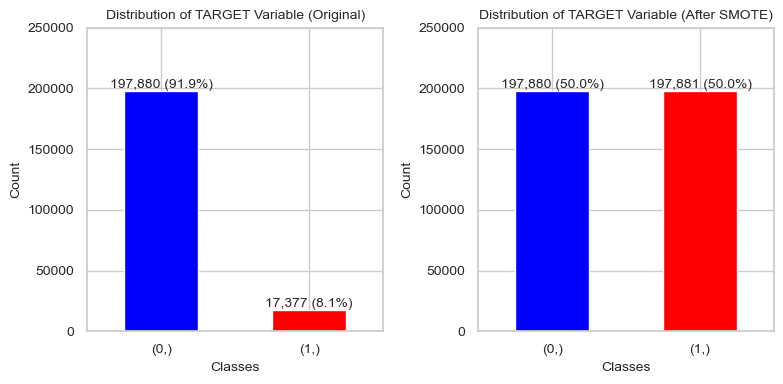


Step 7 completed!!!



In [12]:
# SMOTE Application
cb.smote_application()

# Feature Selection

#### Search for optimal k-value for feature selection using RandomizedSearchCV

- You do not have to run this code; it takes aprroximately 1hr 10mins to complete running depending on your system specification

In [13]:
# Run code to search for optimal k-value for feature selection using RandomizedSearchCV
feat_select.feature_selection()

Fitting RandomizedSearchCV: 100%|███████████████████████████████████████████████████| 10/10 [1:07:29<00:00, 404.96s/it]

Feature Selection: Comparison of K-Value for Feature Selection
---------------------------------------------------------------



,param_selectkbest__k,mean_test_score,std_test_score,rank_test_score
1,27,0.923818,0.000694,1
9,26,0.923274,0.000928,2
8,28,0.923247,0.000863,3
2,25,0.922082,0.000287,4
7,13,0.919575,0.000174,5
3,11,0.919424,0.001066,6
5,15,0.916616,0.000141,7
4,18,0.915439,0.000639,8
6,21,0.914567,0.000858,9
0,10,0.912038,0.001080,10



Step 8 completed!!!



### Preprocessing pipeline

In [14]:
# Run the preprocessing function
gen_func.preprocess_dataset()

Preprocessing data: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:20<00:00, 20.68s/it]


Preprocessing: Data preprocessed for modelling
---------------------------------------------------------------

The shape of the processed_trainset is: 395,762 rows, and 25 columns
The shape of the processed_testset is: 92,254 rows, and 25 columns

Step 9 completed!!!



# Model Training

In [15]:
# Model Training

model_dev.model_development()

Training Models: 100%|██████████████████████████████████████████████████████████████████| 6/6 [21:18<00:00, 213.13s/it]

Model Development: Cross-Validation Results on Training Set
-------------------------------------------------------------



,Classifier,Accuracy
0,RandomForest,0.9475 ± 0.0003
1,LogisticRegression,0.9182 ± 0.0006
2,DecisionTree,0.9154 ± 0.0003
3,HistGradientBoosting,0.9324 ± 0.0008
4,VotingEnsemble,0.9390 ± 0.0002
5,StackingEnsemble,0.9528 ± 0.0008



Step 10 completed!!!



In [5]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
?StackingClassifier

Init signature:
StackingClassifier(
    estimators,
    final_estimator=None,
    *,
    cv=None,
    stack_method='auto',
    n_jobs=None,
    passthrough=False,
    verbose=0,
)
Docstring:     
Stack of estimators with a final classifier.

Stacked generalization consists in stacking the output of individual
estimator and use a classifier to compute the final prediction. Stacking
allows to use the strength of each individual estimator by using their
output as input of a final estimator.

Note that `estimators_` are fitted on the full `X` while `final_estimator_`
is trained using cross-validated predictions of the base estimators using
`cross_val_predict`.

Read more in the :ref:`User Guide <stacking>`.

.. versionadded:: 0.22

Parameters
----------
estimators : list of (str, estimator)
    Base estimators which will be stacked together. Each element of the
    list is defined as a tuple of string (i.e. name) and an estimator
    instance. An estimator can be set to 'drop' using `set_p

#### Model Evaluation on the test dataset

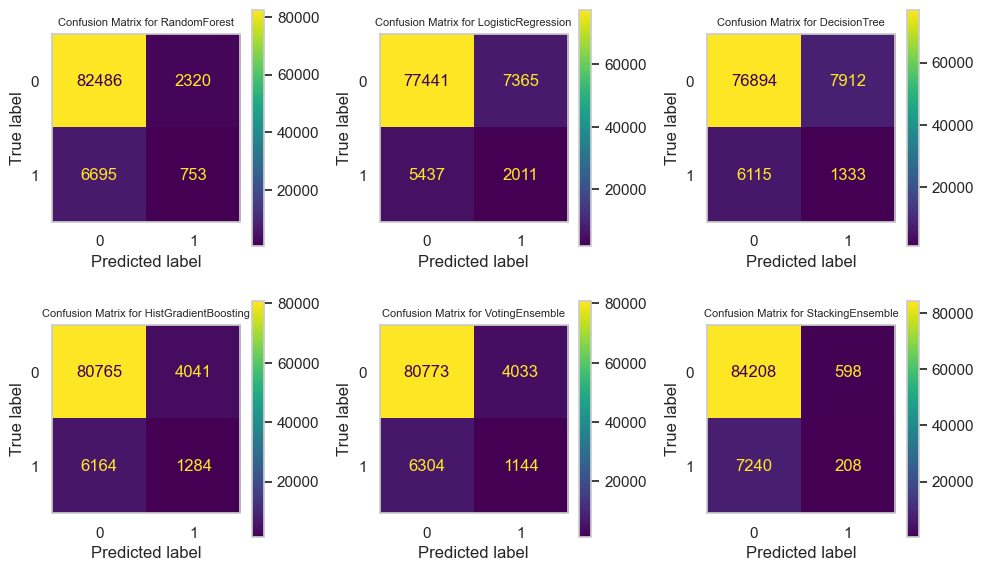

### Model Evaluation Report on Test Data ###


,class,precision,recall,f1-score,model
0,0,0.924928,0.972643,0.948186,RandomForest
1,1,0.245037,0.101101,0.143142,RandomForest
2,accuracy,0.902281,0.902281,0.902281,RandomForest
3,0,0.934398,0.913155,0.923654,LogisticRegression
4,1,0.214484,0.270005,0.239063,LogisticRegression
5,accuracy,0.861231,0.861231,0.861231,LogisticRegression
6,0,0.926333,0.906705,0.916414,DecisionTree
7,1,0.144186,0.178974,0.159708,DecisionTree
8,accuracy,0.847952,0.847952,0.847952,DecisionTree
9,0,0.929092,0.952350,0.940577,HistGradientBoosting


In [16]:
# Model Evaluation
model_dev.model_evaluation()

### Generate synthetic augmented data and plot the distribution

Generating sythentic augmented dataset: 100%|██████████████████████████████████████████| 25/25 [00:00<00:00, 30.11it/s]


Comparison of Feature Distributions: Original Test Data vs. Augmented Test Data
--------------------------------------------------------------------------------


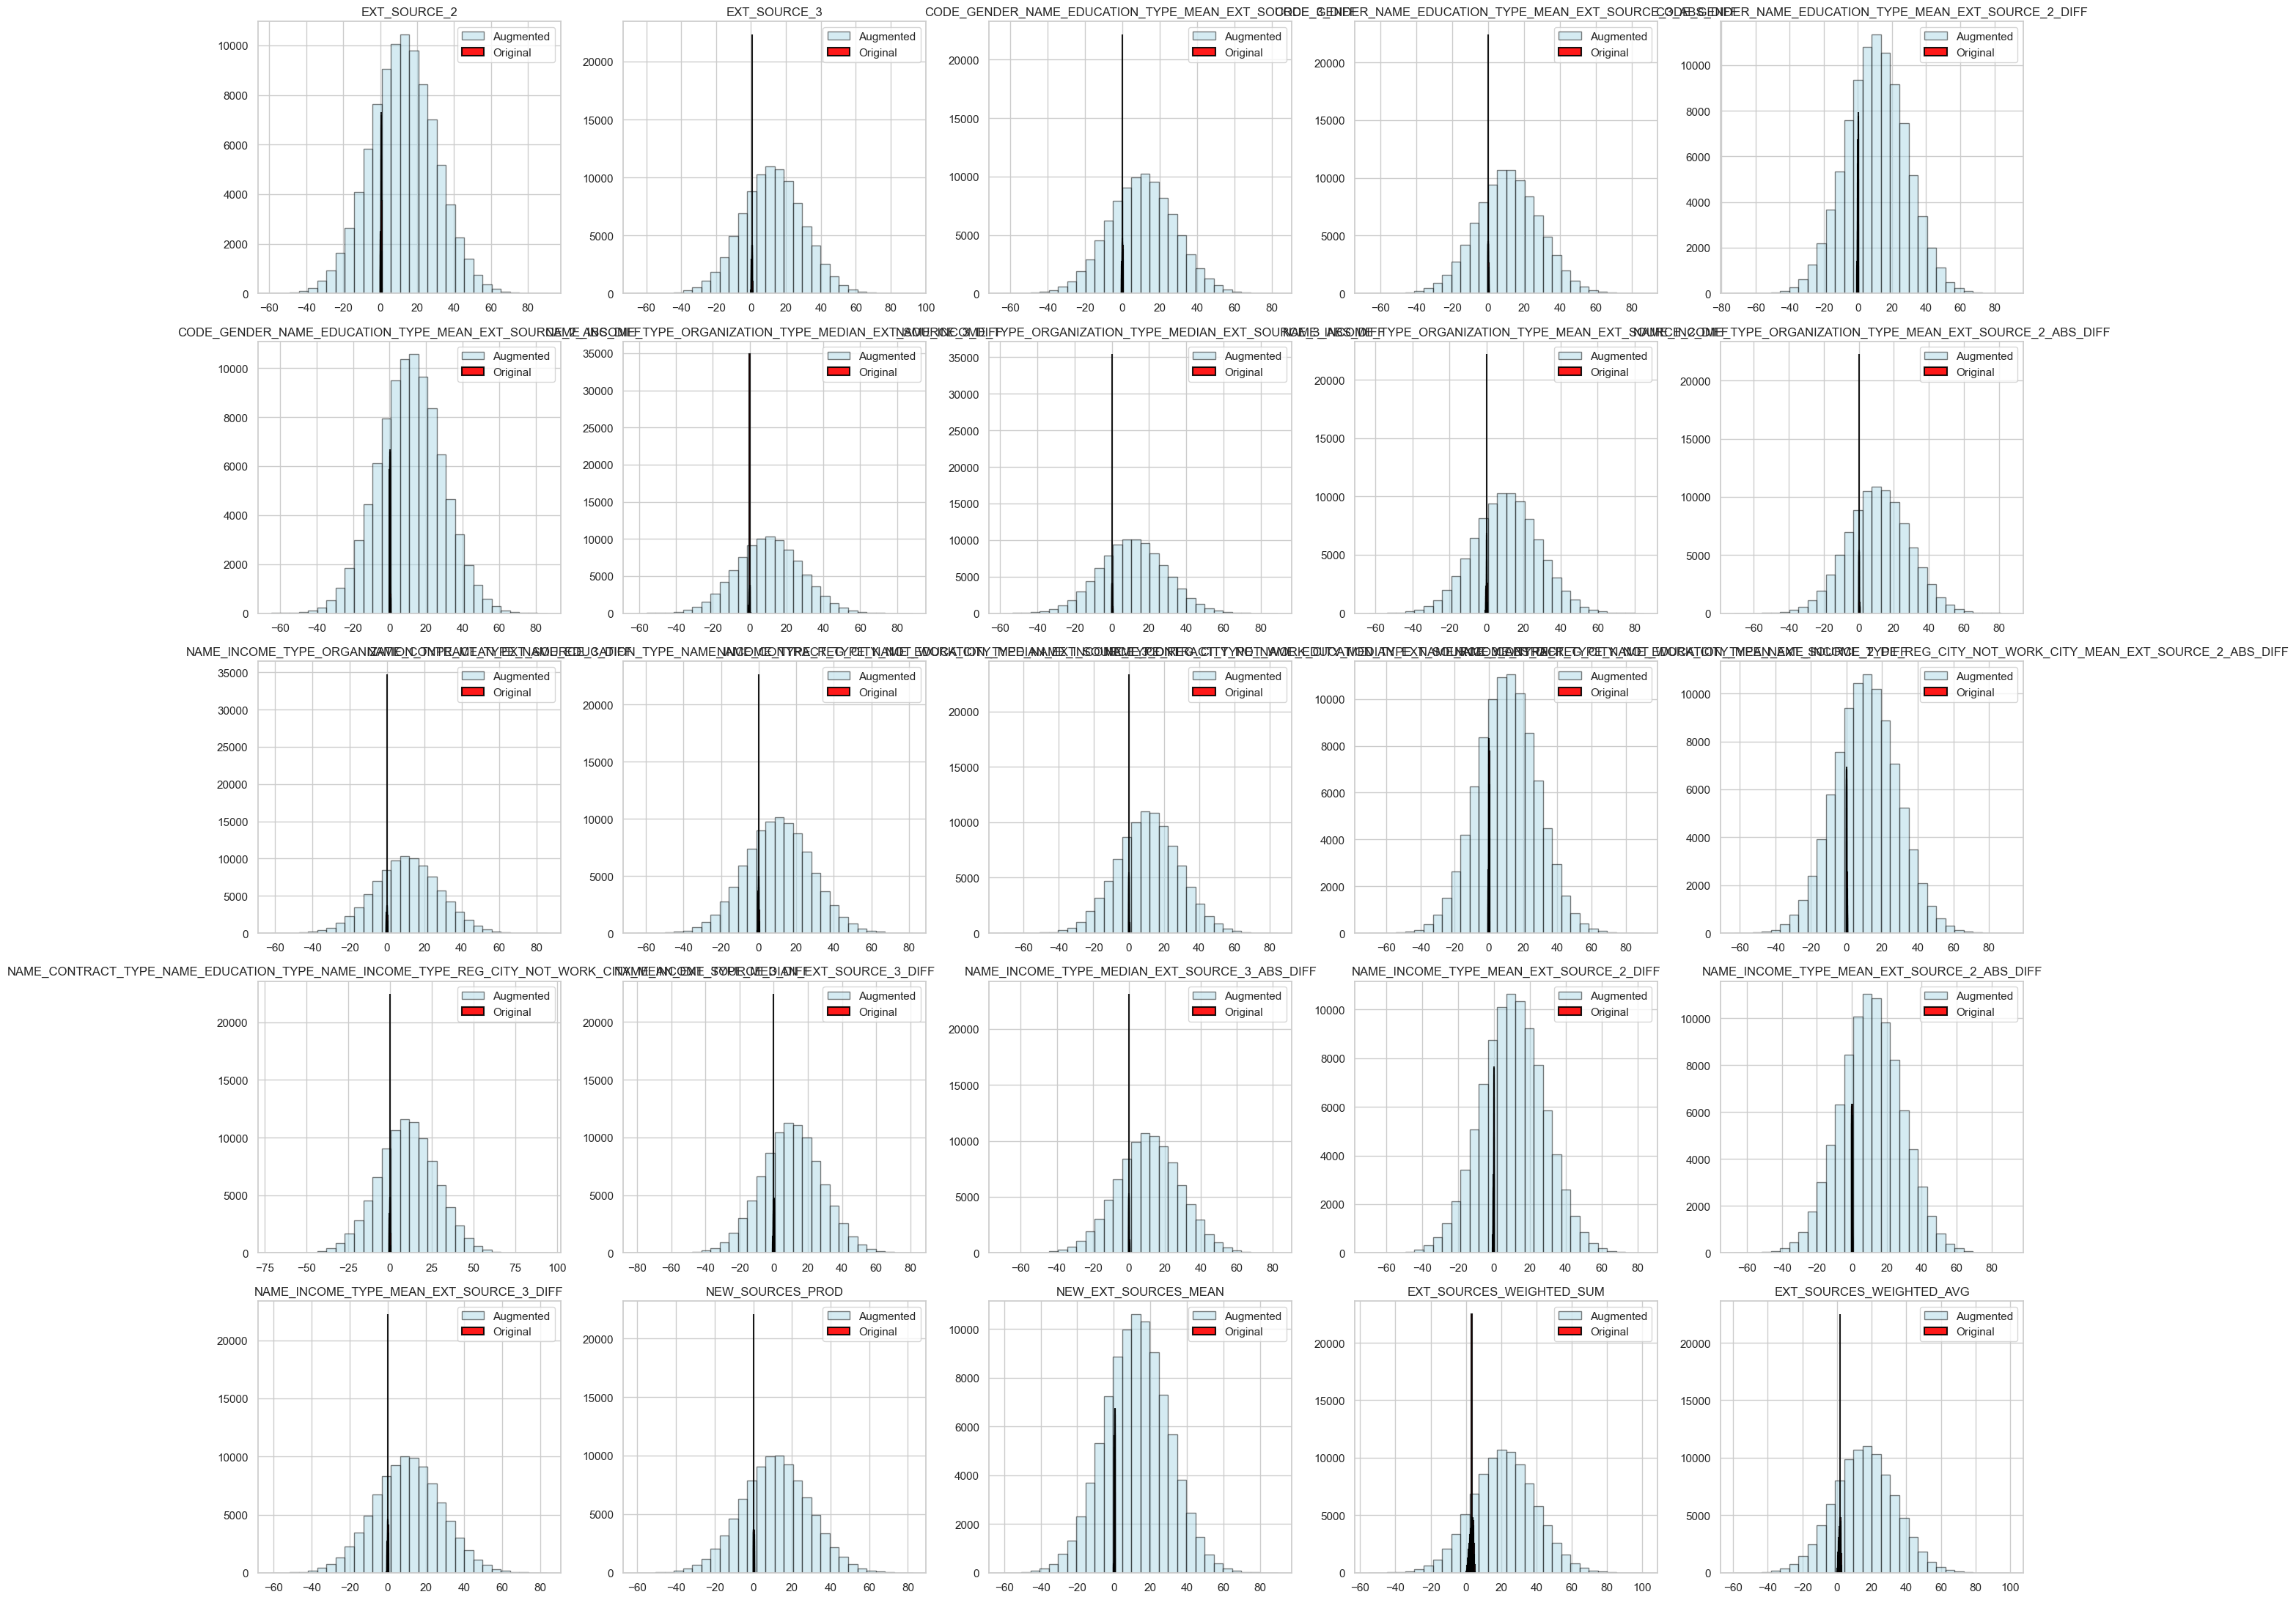

In [17]:
## Generate synthetic augmented data and plot the distribution

sda.sythentic_data()

### Model Stability Evaluation

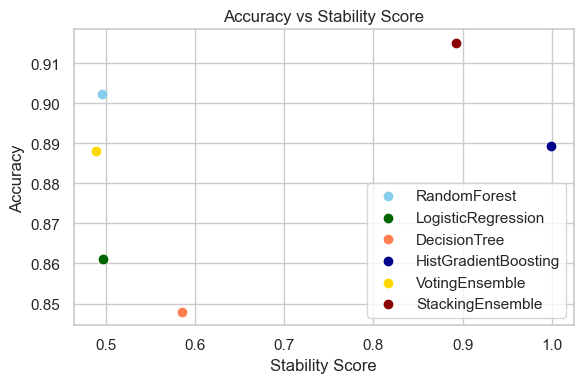

Accuracy and Stability Scores of Classifiers on Original vs. Augmented Test Sets
--------------------------------------------------------------------------------


,Classifiers,Accuracy (Original testset),Accuracy (Augmented testset),Stability Score
0,RandomForest,0.902281,0.446821,0.495213
1,LogisticRegression,0.861231,0.427418,0.496287
2,DecisionTree,0.847952,0.496499,0.585527
3,HistGradientBoosting,0.889381,0.889934,0.999378
4,VotingEnsemble,0.887951,0.434323,0.489129
5,StackingEnsemble,0.915039,0.816431,0.892236


In [18]:
# Model Stability Evaluation
sda.model_stability_evaluation()

### Model Explainability 

##### Model Explainability - Sobol Sensitivity Analysis: First order indices for Hist-GradientBoosting Decition Tree (Best Stable model)

Hist-Gradient Boosting Classifier Model Explanation: Highlighting Contributions of Features to Model Output Variance
---------------------------------------------------------------------------------------------------------------------


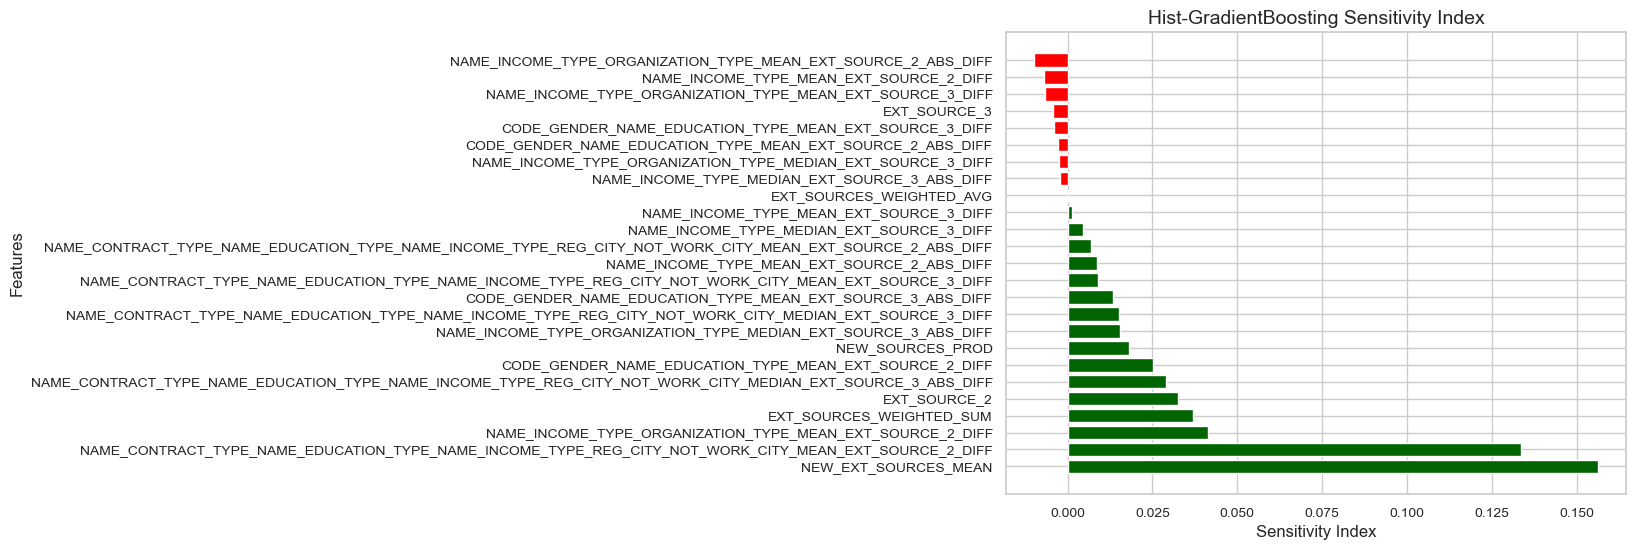

In [19]:
# Model Explainability - Sobol Sensitivity Value
model_explainer.sensitivity_analysis()

##### Model Explainability - SHapley exPlanations Values: Explanations for Hist-GradientBoosting Decition Tree

Summary plots to explain the relationship between input features and model output
---------------------------------------------------------------------------------


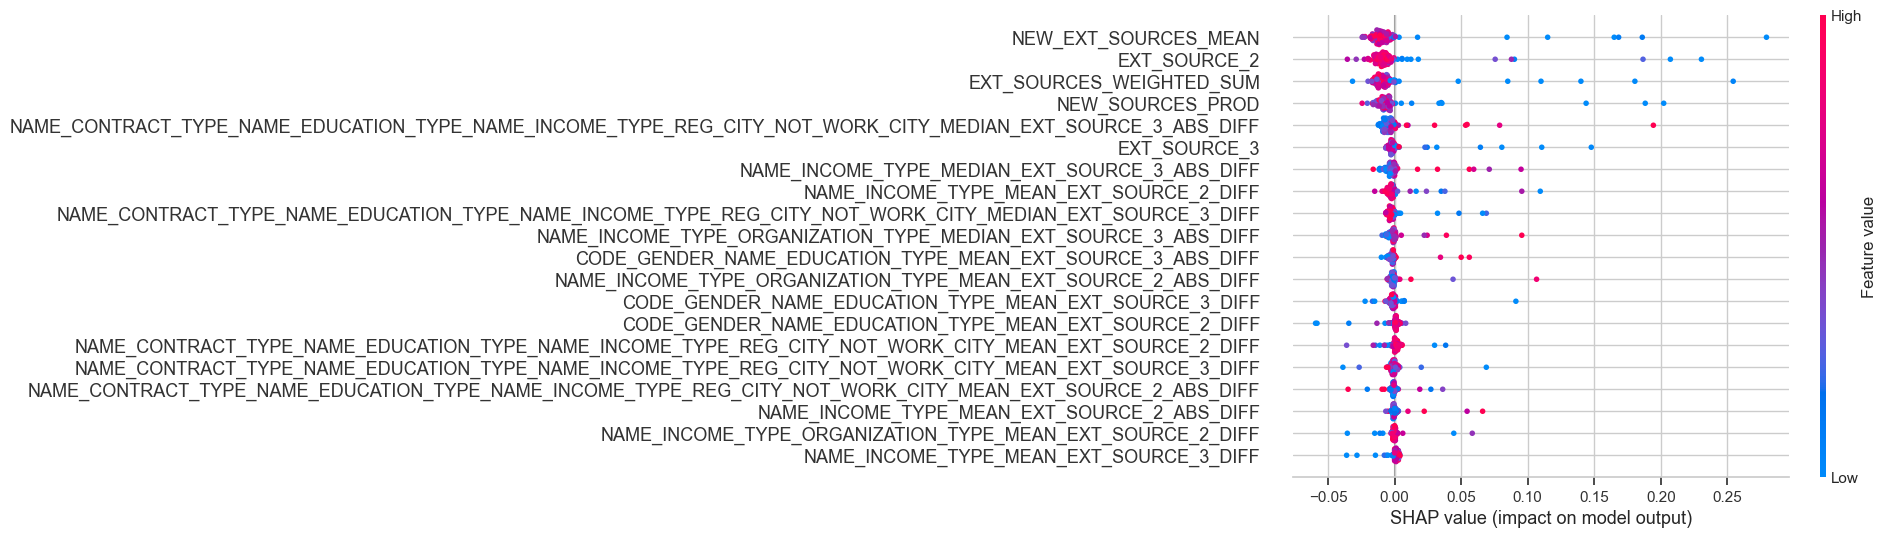

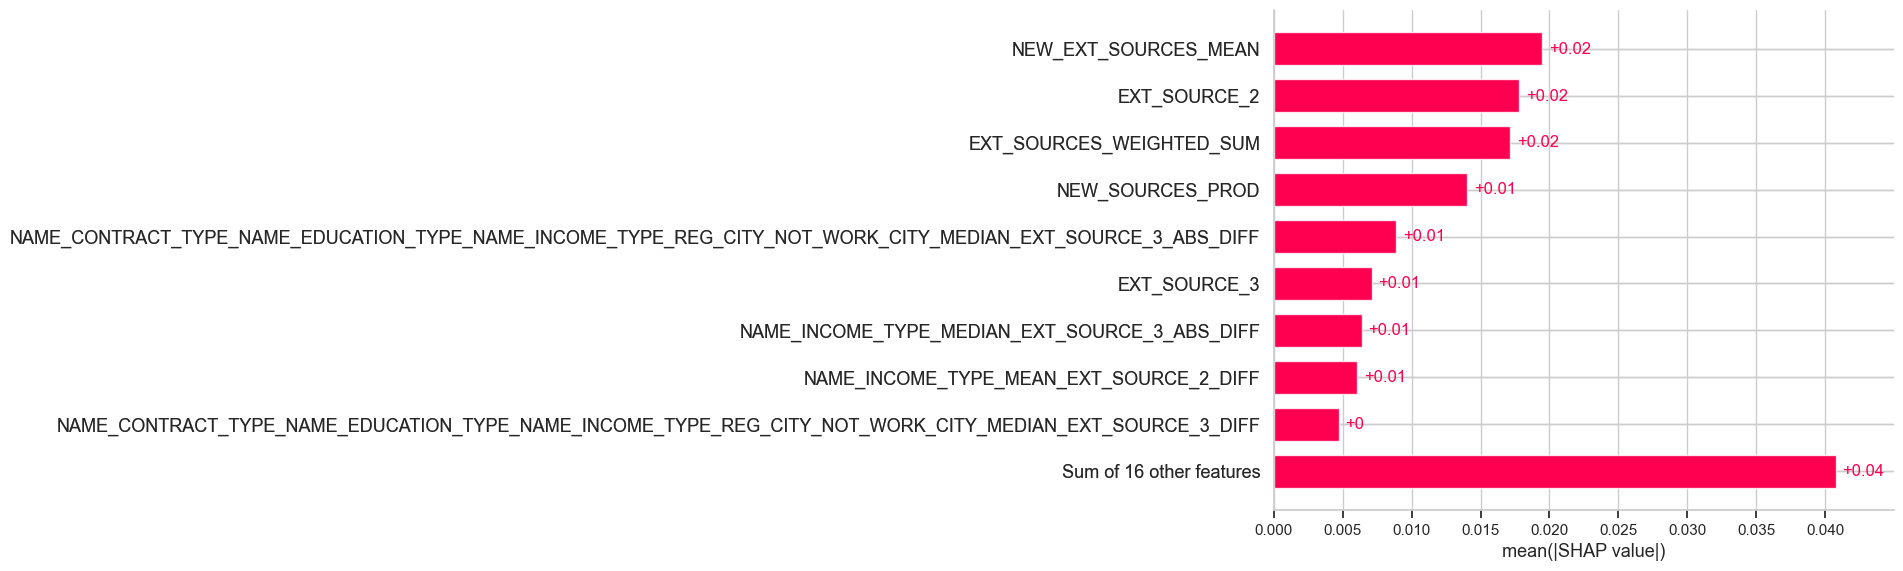

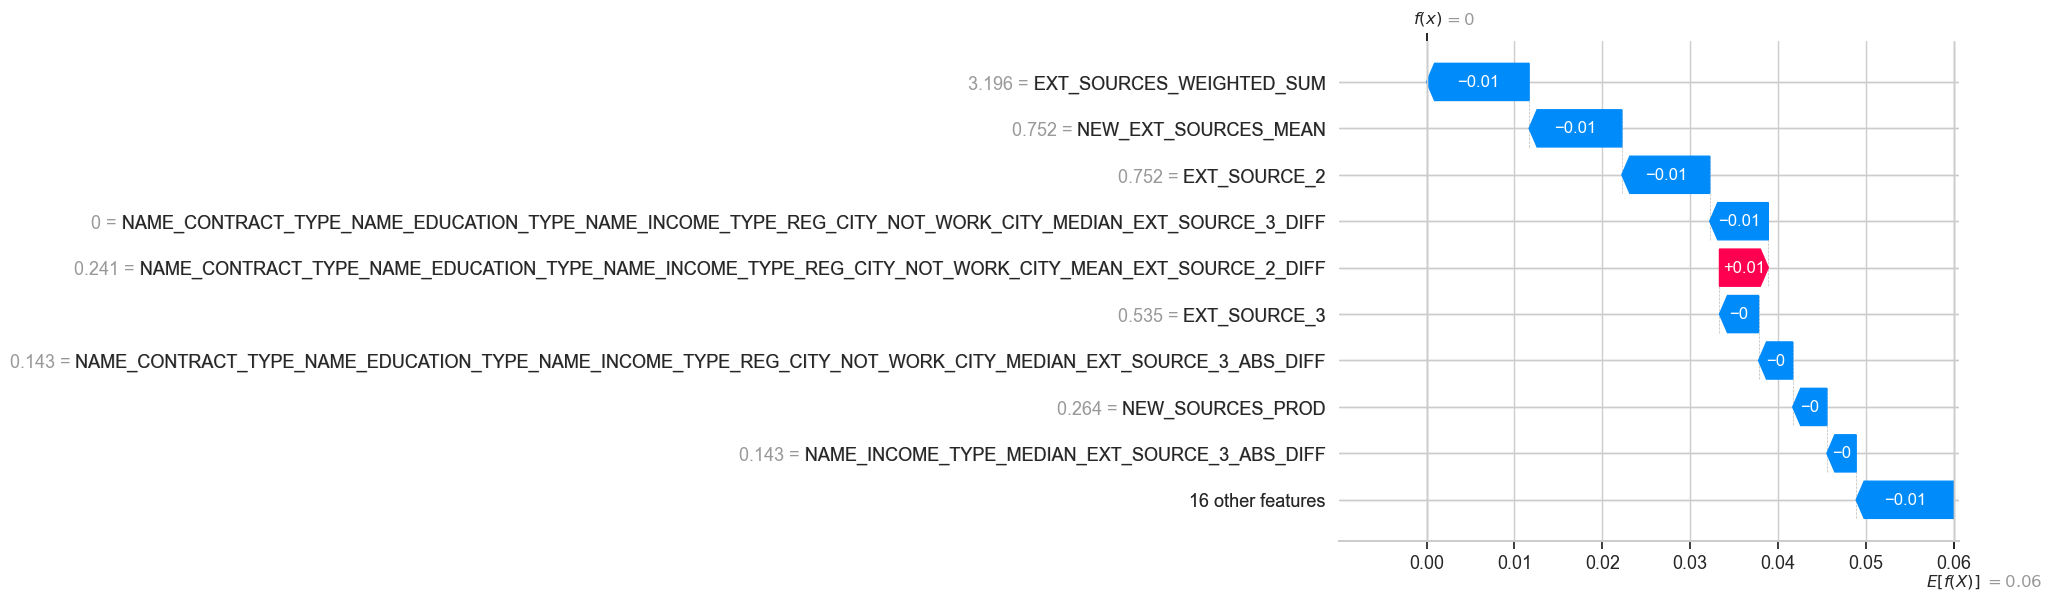

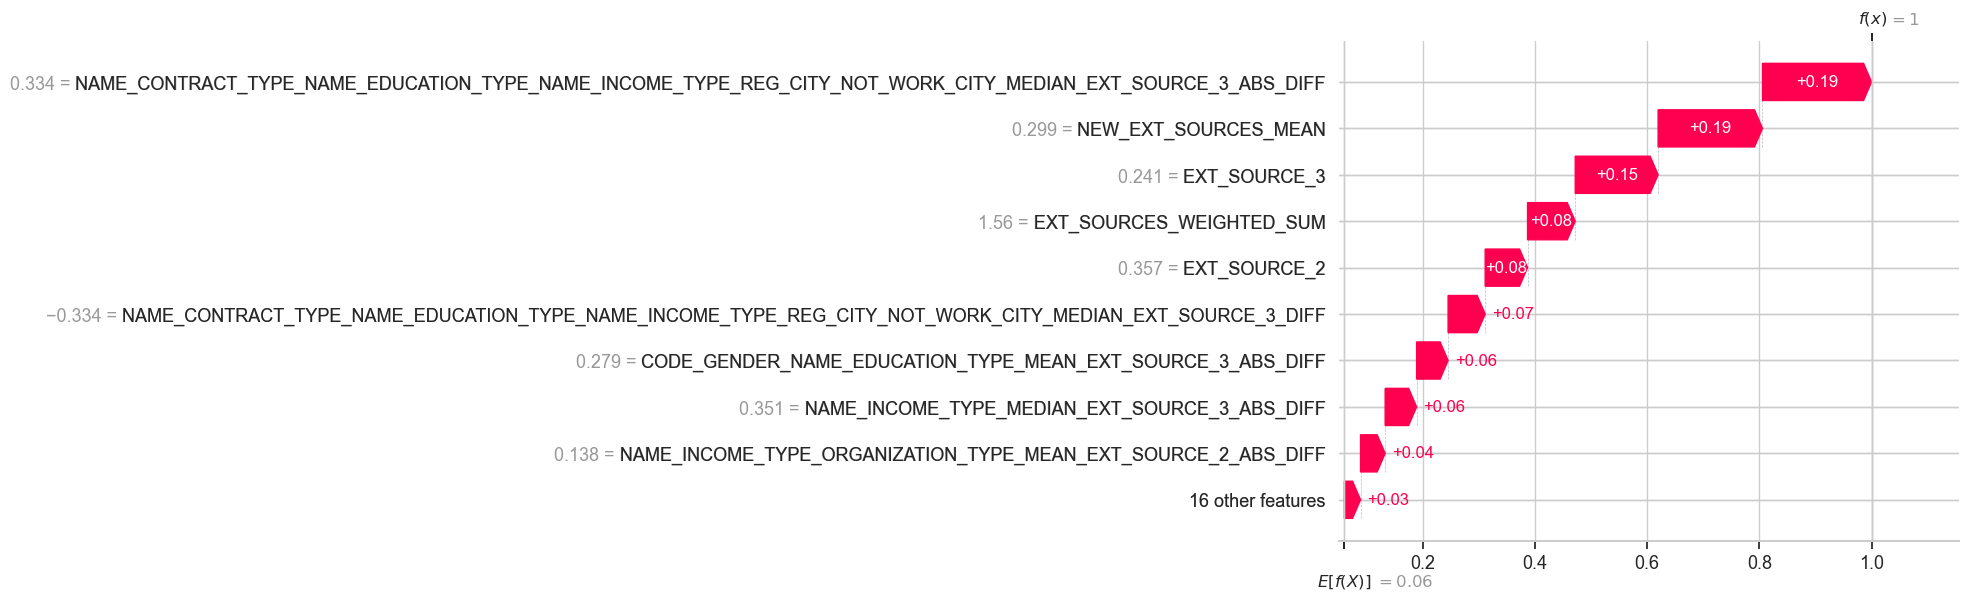

In [20]:
## Model Explainability - SHapley exPlanations Values
model_explainer.shap_explaination()